In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from kneed import KneeLocator

In [19]:
feature_set = pd.read_csv('../data/feature_set.csv')
new_feature_set = feature_set.drop(['id'], axis=1)
new_feature_set.head()

,genre_21st_century_classical,genre_432hz,genre__hip_hop,genre__roll,genre_a_cappella,...,liveness,valence,tempo,artist_popularity,track_popularity
0,0.0,0.0,0.0,0.0,0.0,...,0.00942,0.162325,0.114421,0.148,0.142268
1,0.0,0.0,0.0,0.0,0.0,...,0.04840,0.185170,0.130453,0.168,0.171134
2,0.0,0.0,0.0,0.0,0.0,...,0.01196,0.140481,0.090525,0.172,0.051546
3,0.0,0.0,0.0,0.0,0.0,...,0.01042,0.163727,0.092087,0.164,0.162887
4,0.0,0.0,0.0,0.0,0.0,...,0.06260,0.131062,0.086421,0.150,0.004124


In [20]:
prefixes = ['genre', 'subjectivity', 'polarity', 'key', 'mode']

filtered_columns = [column for column in new_feature_set.columns if not any(
    column.startswith(prefix) for prefix in prefixes)]

filtered_feature_set = new_feature_set[filtered_columns]

filtered_feature_set.head()

,danceability,energy,loudness,speechiness,acousticness,...,liveness,valence,tempo,artist_popularity,track_popularity
0,0.182996,0.1626,0.168547,0.025156,0.006245,...,0.00942,0.162325,0.114421,0.148,0.142268
1,0.156680,0.1676,0.178715,0.023701,0.005000,...,0.04840,0.185170,0.130453,0.168,0.171134
2,0.134413,0.1516,0.170210,0.043659,0.000478,...,0.01196,0.140481,0.090525,0.172,0.051546
3,0.180567,0.1428,0.171892,0.029314,0.040361,...,0.01042,0.163727,0.092087,0.164,0.162887
4,0.172672,0.1212,0.176541,0.014823,0.011265,...,0.06260,0.131062,0.086421,0.150,0.004124


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

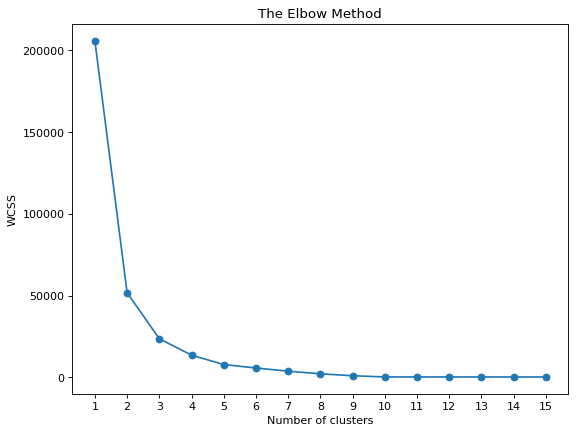

In [32]:
# decide n-cluster using Elbow Method

# within-cluster sum of squares
# sum of squared distances from each point to its assigned cluster center for different values of k.
wcss = []

k_range = range(1, 16)

for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(filtered_feature_set)
    wcss.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(8, 6), dpi=80)

plt.plot(k_range, wcss, marker='o')

plt.xticks(k_range)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.show()

In [33]:
kl = KneeLocator(range(1, 16), wcss, curve='convex', direction='decreasing')

kl.elbow

3

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='PC1', ylabel='PC2'>

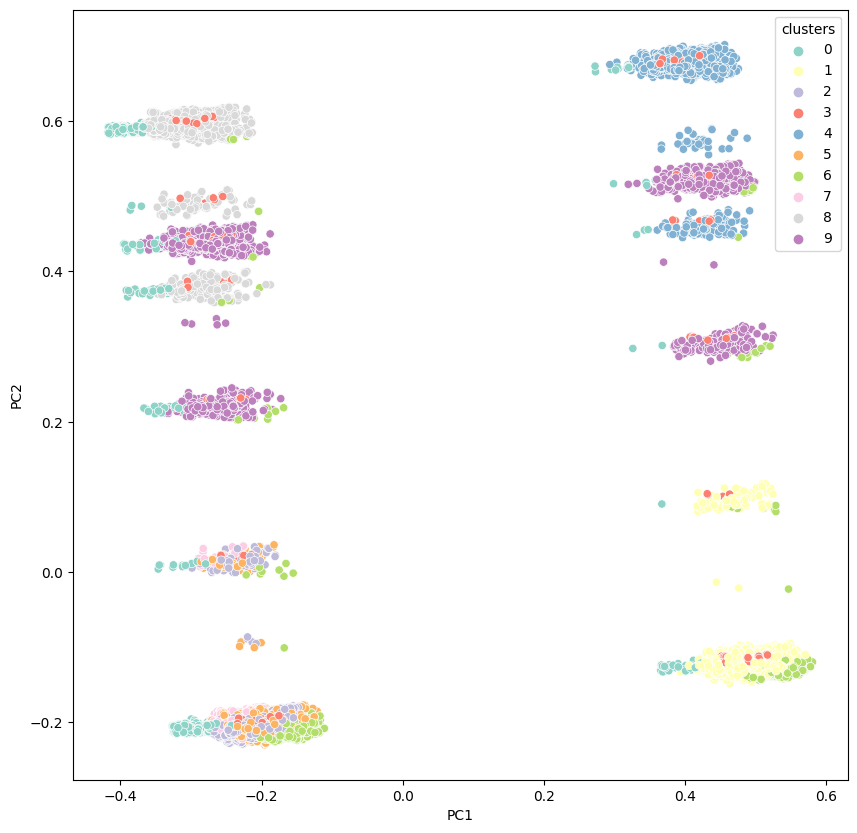

In [35]:
kmeans = KMeans(n_clusters=10)
k_fit = kmeans.fit(new_feature_set)

predictions = k_fit.labels_

new_feature_set['clusters'] = predictions

pca = PCA(2)

pca_data = pd.DataFrame(pca.fit_transform(
    new_feature_set.drop(['clusters'], axis=1)), columns=['PC1', 'PC2'])

pca_data['clusters'] = predictions

plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_data, x='PC1', y='PC2',
                hue='clusters', palette='Set3')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/vy/c6j5yw3x6td0lcrhv8v891900000gn/T/ipykernel_11221/3415038414.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_feature_set['clusters'] = predictions


<Axes: xlabel='PC1', ylabel='PC2'>

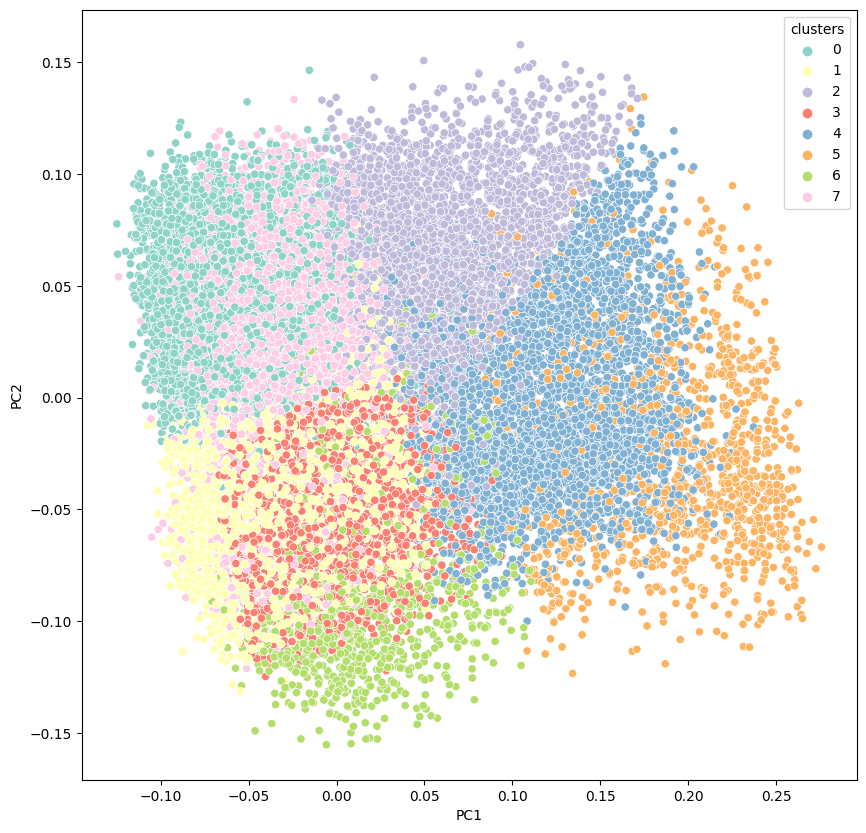

In [37]:
kmeans = KMeans(n_clusters=8)
k_fit = kmeans.fit(filtered_feature_set)

predictions = k_fit.labels_

filtered_feature_set['clusters'] = predictions

pca = PCA(2)

pca_data = pd.DataFrame(pca.fit_transform(
    filtered_feature_set.drop(['clusters'], axis=1)), columns=['PC1', 'PC2'])

pca_data['clusters'] = predictions

plt.figure(figsize=(10, 10))
sns.scatterplot(data=pca_data, x='PC1', y='PC2',
                hue='clusters', palette='Set3')